In [1]:
#!pip install lightgbm

In [54]:
import lightgbm as lgb
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [55]:
#importer le dataset
Data = pd.read_csv('C:/Users/tahaj/OneDrive/Bureau/Stage/NightTimeLightCollection/preprocess_saudiarabia.csv',sep=";")
Data.head()

,Date,SOL,GDP
0,01/01/2012,5.461777e+06,5.804692e+11
1,01/04/2012,6.578292e+06,5.728170e+11
2,01/07/2012,6.034126e+06,5.760421e+11
3,01/10/2012,6.016527e+06,5.885344e+11
4,01/01/2013,6.884214e+06,5.826578e+11


In [56]:
# Séparer les caractéristiques (X) et les étiquettes (Y)
X = Data['SOL']
Y = Data['GDP']


In [57]:
# Convertir les données en un objet lgb.Dataset
train_data = lgb.Dataset(X.values.reshape(-1, 1), label=Y)
print(train_data)

In [58]:
# Les paramètres du modèle LightGBM pour une régression
params = {
    'objective': 'regression',
    'metric': 'rmse'
}

In [64]:
import warnings
# Désactiver tous les avertissements
warnings.filterwarnings("ignore")

# Entraîner le modèle LightGBM
model = lgb.train(params, train_data)


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16
[LightGBM] [Info] Number of data points in the train set: 44, number of used features: 1
[LightGBM] [Info] Start training from score 660685388334.545410
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

In [60]:
# Faire des prédictions sur les données d'entraînement
predictions = model.predict(X.values.reshape(-1, 1))

In [61]:
print(predictions)

[6.29155802e+11 6.29155802e+11 6.29155802e+11 6.29155802e+11
 6.29155802e+11 6.29155802e+11 6.29155802e+11 6.29155802e+11
 6.29155802e+11 6.29155802e+11 6.29155802e+11 6.29155802e+11
 6.29155802e+11 6.29155802e+11 6.29155802e+11 6.29155802e+11
 6.29155802e+11 6.29155802e+11 6.29155802e+11 6.29155802e+11
 6.91123249e+11 6.91123249e+11 6.91123249e+11 6.78473425e+11
 6.91123249e+11 6.91123249e+11 6.29155802e+11 6.78473425e+11
 6.91123249e+11 6.78473425e+11 6.91123249e+11 6.91123249e+11
 6.91123249e+11 6.91123249e+11 6.91123249e+11 6.91123249e+11
 6.91123249e+11 6.91123249e+11 6.91123249e+11 6.91123249e+11
 6.91123249e+11 6.91123249e+11 6.91123249e+11 6.91123249e+11]


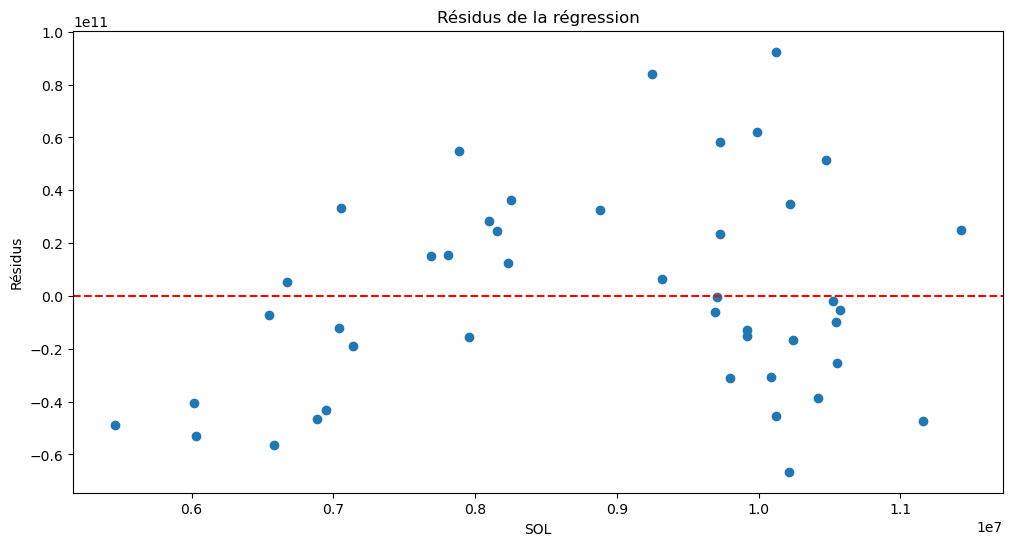

In [62]:
# Afficher les résidus
residuals = Y - predictions
plt.figure(figsize=(12, 6))
plt.plot(X, residuals, marker='o', linestyle='None')
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('SOL')
plt.ylabel('Résidus')
plt.title('Résidus de la régression')
plt.show()

In [63]:
# Calculer le coefficient de détermination (R²)
y_mean = Y.mean()
ss_total = ((Y - y_mean) ** 2).sum()
ss_residual = ((Y - predictions) ** 2).sum()
r2 = 1 - (ss_residual / ss_total)

print('Coefficient de détermination (R²) :', r2)

Coefficient de détermination (R²) : 0.3833521279643288
